In [875]:
# Imports
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [876]:
# Pandas Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [877]:
# Import CSV
inital_slice = pd.read_csv('240112_150239_Slice1.csv')
final_slice = pd.read_csv('240112_150239_Slice793.csv')

overall = pd.read_csv('240112_150239_averages.csv_Zone_Overall.csv')

In [878]:
# Clean up CSVs

# List of columns that are int and should be in float to facilatate proper merging
columns_to_fix = ['Reproduction Interval', 'Lifespan', 'Courage', 'Intimidation', 
                  'Perception', 'Reproduction', 'Size', 'Speed', 'Stealth', 
                  'Territory', 'algae', 'fruit', 'nectar', 'pollen', 'sap', 
                  'seeds', 'wood']

# Apply casting to desired columns
inital_slice[columns_to_fix] = inital_slice[columns_to_fix].astype(float)
final_slice[columns_to_fix] = final_slice[columns_to_fix].astype(float)

# Merge slices
merged_slices = pd.merge(inital_slice, final_slice, how='outer')

# Remove extranious entries
merged_slices = merged_slices[merged_slices['Lifespan'] != 1000]

In [879]:
# Visualization colors

pie_chart_colors = ['mediumseagreen','sandybrown', 'khaki', 'forestgreen', 'lightgreen', 'saddlebrown', 'darkolivegreen']
stacked_histogram_colors = ['mediumseagreen', 'khaki', 'forestgreen', 'saddlebrown', 'lightgreen', 'wheat']
box_plot_colors = ['peachpuff', 'salmon', 'lightskyblue']
bar_graph_color = ['peachpuff', 'salmon', 'lightskyblue']


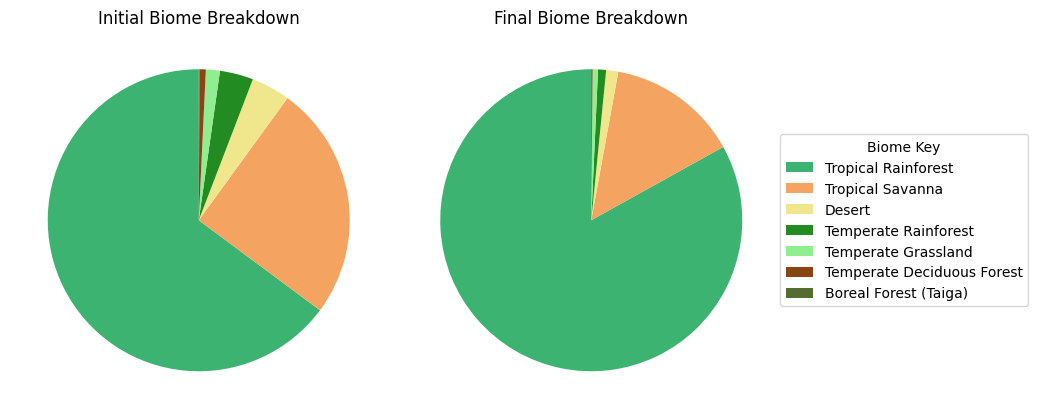

In [880]:
# Visualization 1, Pie Chart showing biomes

# Create data from both slices
intial_counts = inital_slice['Biome'].value_counts()
final_counts = final_slice['Biome'].value_counts()

labels = list(intial_counts.keys())

fig, axs = plt.subplots(1, 2, figsize=(8, 5))

# Graph Charts
wedges, _ = axs[0].pie(intial_counts, startangle=90, colors=pie_chart_colors)
axs[1].pie(final_counts, startangle=90, colors=pie_chart_colors)

# Formatting
axs[0].set_title('Initial Biome Breakdown')
axs[1].set_title('Final Biome Breakdown')
fig.legend(wedges, labels, title="Biome Key", loc="center right", bbox_to_anchor=(1, 0, 0.3, 1))

plt.tight_layout()
plt.show()

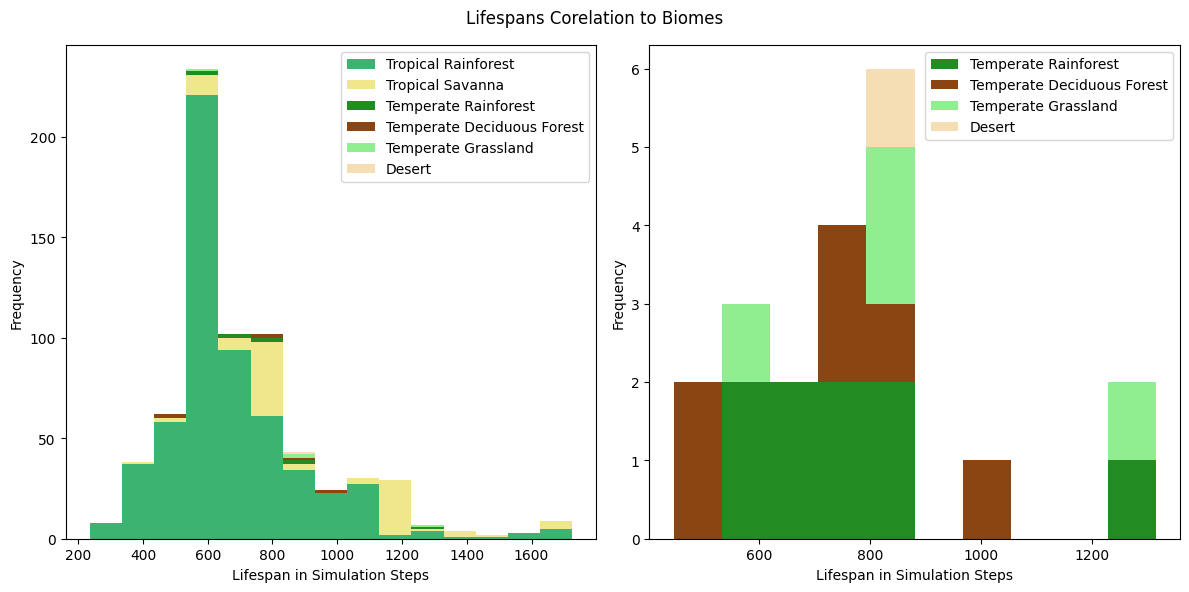

In [881]:
# Visualization 2, Stacked Histogram regarding lifespans split up by biomes

# Pivot dataframe on lifespans whislts splitting by biome
pivoted_g1 = merged_slices.pivot(values='Lifespan', columns='Biome')

non_nan_counts = pivoted_g1.notna().sum()
sorted_columns = non_nan_counts.sort_values(ascending=False).index
pivoted_g1 = pivoted_g1[sorted_columns]

stacked_data = []

for col in pivoted_g1:
    stacked_data.append(pivoted_g1[col][pivoted_g1[col].notna()])

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Graph Data
axs[0].hist(stacked_data, stacked=True, bins=15, color=stacked_histogram_colors)
axs[0].legend(labels=pivoted_g1.columns, loc='upper right')

stacked_data_without_majority = stacked_data[2:]

axs[1].hist(stacked_data_without_majority, stacked=True, bins=10, color=stacked_histogram_colors[2:])
axs[1].legend(labels=pivoted_g1.columns[2:], loc='upper right')

# Formatting
fig.suptitle('Lifespans Corelation to Biomes')

plt.setp(axs[:2], xlabel='Lifespan in Simulation Steps')
plt.setp(axs[:2], ylabel='Frequency')

plt.tight_layout()
plt.show()

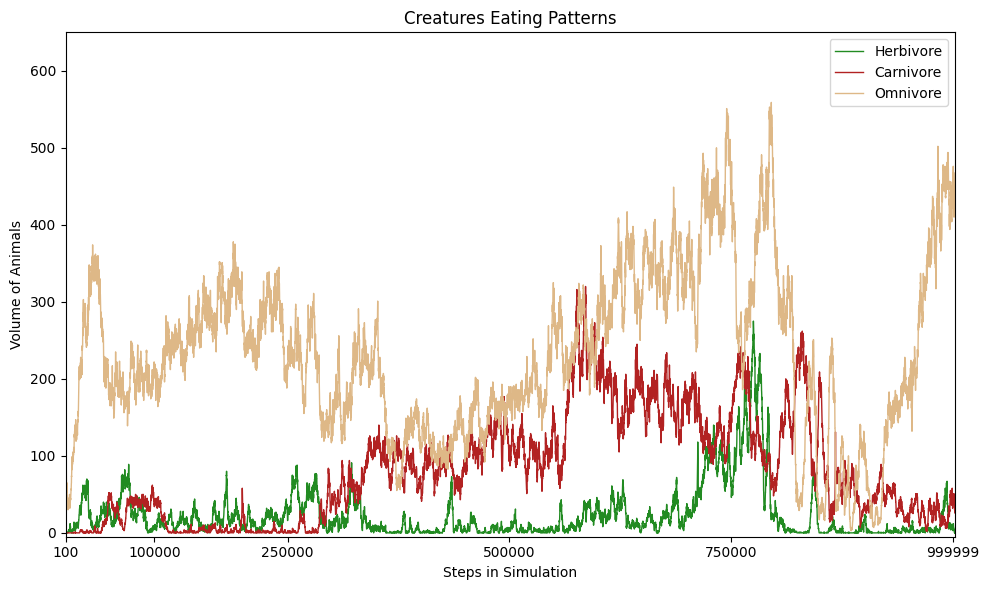

In [882]:
# Visualization 3, Line graph comparing eating patterns

graph_5_data = overall.copy()

fig, ax = plt.subplots(figsize=(10, 6))

# Plot data
ax.plot(graph_5_data['Turn'], graph_5_data['Herbivores'], linewidth=1, color='forestgreen')
ax.plot(graph_5_data['Turn'], graph_5_data['Carnivores'], linewidth=1, color='firebrick')
ax.plot(graph_5_data['Turn'], graph_5_data['Omnivores'], linewidth=1, color='burlywood')

# Formatting
ax.set_title("Creatures Eating Patterns")
ax.set_ylabel('Volume of Animals')
ax.set_xlabel('Steps in Simulation')

ax.legend(['Herbivore', 'Carnivore', 'Omnivore'])

ax.set_ylim(-5, 650)
ax.set_xlim(0, 1_001_800)
ax.set_xticks([100, 100000, 250000, 500000, 750000, 999999])

plt.tight_layout()
plt.show()



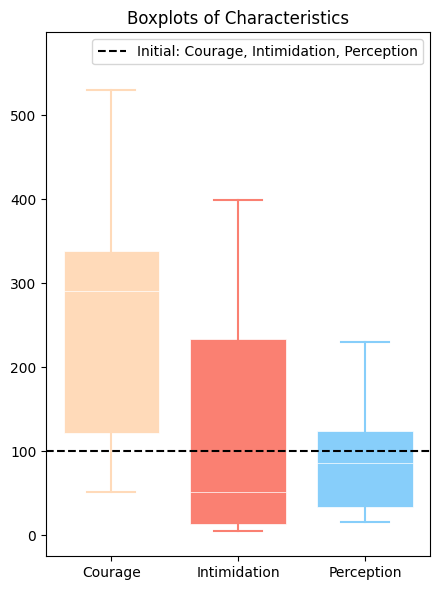

In [883]:
# Visualization 4, Box plots showing Charteristics and thier baseline

figs, ax = plt.subplots(figsize=(4.5, 6))

data = [final_slice['Courage'], final_slice['Intimidation'], final_slice['Perception']]

# Average asigned to all three Charteristics
baseline = 100

# Plot data
plot = ax.boxplot(data, positions=[2, 4, 6], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"linewidth": 1.5},
                capprops={"linewidth": 1.5}, labels=['Courage', 'Intimidation', 'Perception'])

patch = ax.axline((1.25, baseline), (6, baseline), ls='--', color='black')

# Graph formatting to make it look pretty :)
whisker_and_cap_colors = [x for x in box_plot_colors for _ in range(2)]

for patch, color in zip(plot['boxes'], box_plot_colors):
    patch.set_facecolor(color)

for index, whisker, in enumerate(plot['whiskers']):
    whisker.set(color=whisker_and_cap_colors[index], linewidth=1.5)
    plot['caps'][index].set(color=whisker_and_cap_colors[index], linewidth=1.5)

plt.ylim(-25, 599)

# Custom Legend
center_line = mlines.Line2D([0, 1], [0, 1], color='black', linestyle='--', label='Initial: Courage, Intimidation, Perception')
plt.legend(handles=[center_line], loc='upper right')

plt.title("Boxplots of Characteristics")

# labels deemed not nessasry both are self explanitory
#plt.ylabel("Simulated Value")
#plt.xlabel("Characteristics")

plt.tight_layout()
plt.show()

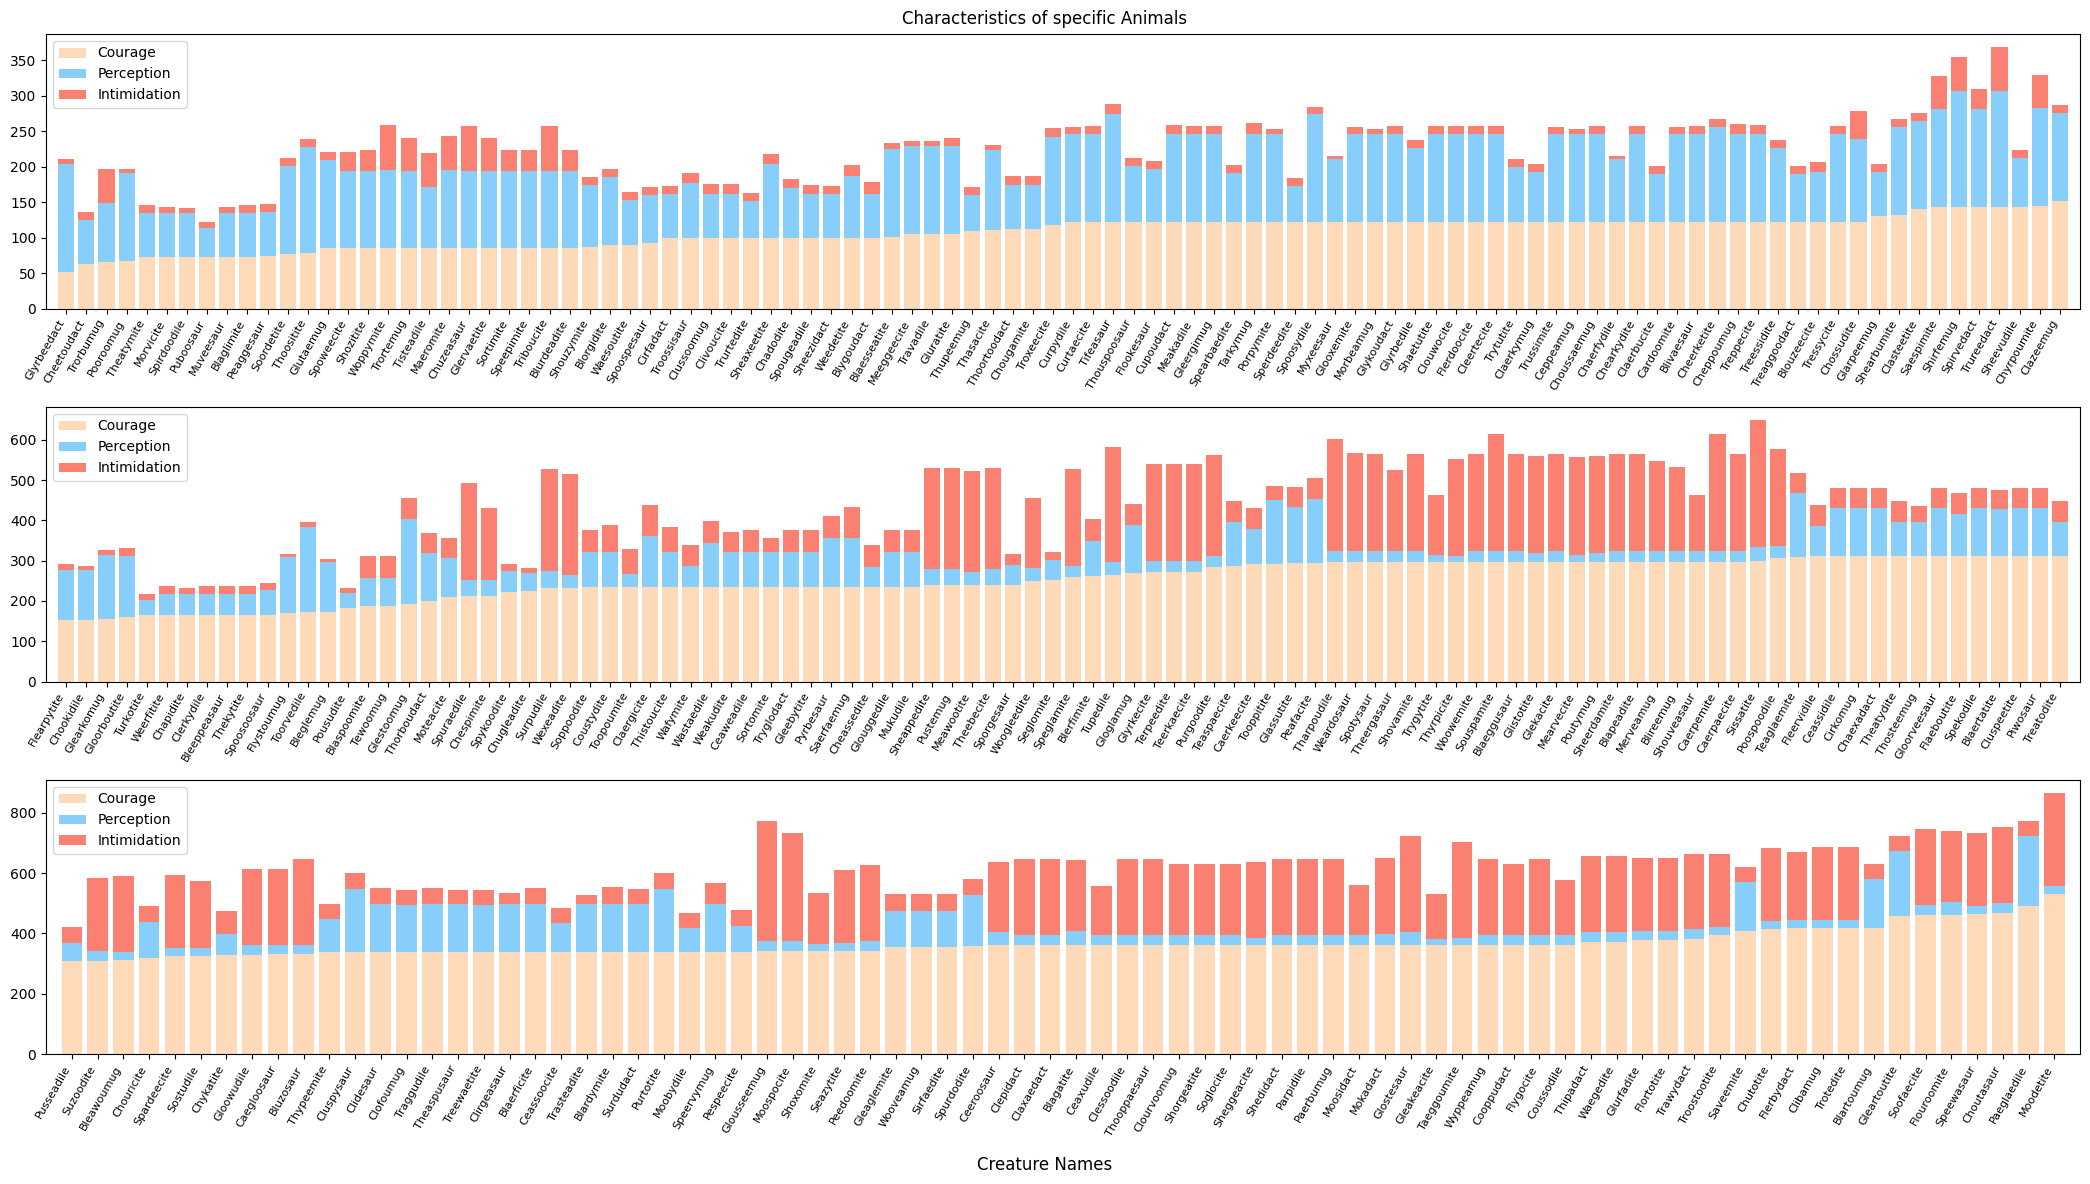

In [884]:
# Visualization 5, Stacked Bar graph for charteristics

bar_graph_data = merged_slices.copy()

bar_graph_data = bar_graph_data[['Creature name', 'Courage', 'Perception', 'Intimidation']]

bar_graph_data.drop_duplicates(inplace=True)

bar_graph_data.sort_values(by=['Courage'], inplace=True)

fig, axs = plt.subplots(3, 1, figsize=(21, 12))

x = bar_graph_data['Creature name']

axs[0].bar(x[:100], bar_graph_data['Courage'][:100], color=bar_graph_color[0])
axs[0].bar(x[:100], bar_graph_data['Perception'][:100], bottom=bar_graph_data['Courage'][:100], color=bar_graph_color[2])
axs[0].bar(x[:100], bar_graph_data['Intimidation'][:100], bottom=(bar_graph_data['Perception'][:100] + bar_graph_data['Courage'][:100]), color=bar_graph_color[1])

axs[0].set_xlim(-1, len(bar_graph_data[:100]))
axs[0].set_xticks(x[:100], labels=x[:100], rotation=60, ha='right', fontsize=8)

axs[0].legend(['Courage', 'Perception', 'Intimidation'], loc='upper left')

axs[1].bar(x[100:200], bar_graph_data['Courage'][100:200], color=bar_graph_color[0])
axs[1].bar(x[100:200], bar_graph_data['Perception'][100:200], bottom=bar_graph_data['Courage'][100:200], color=bar_graph_color[2])
axs[1].bar(x[100:200], bar_graph_data['Intimidation'][100:200], bottom=(bar_graph_data['Perception'][100:200] + bar_graph_data['Courage'][100:200]), color=bar_graph_color[1])

axs[1].set_xlim(-1, len(bar_graph_data[100:200]))
axs[1].set_xticks(x[100:200], labels=x[100:200], rotation=60, ha='right', fontsize=8)

axs[1].legend(['Courage', 'Perception', 'Intimidation'], loc='upper left')

axs[2].bar(x[200:], bar_graph_data['Courage'][200:], color=bar_graph_color[0])
axs[2].bar(x[200:], bar_graph_data['Perception'][200:], bottom=bar_graph_data['Courage'][200:], color=bar_graph_color[2])
axs[2].bar(x[200:], bar_graph_data['Intimidation'][200:], bottom=(bar_graph_data['Perception'][200:] + bar_graph_data['Courage'][200:]), color=bar_graph_color[1])

axs[2].set_xlim(-1, len(bar_graph_data[200:]))
axs[2].set_xticks(x[200:], labels=x[200:], rotation=60, ha='right', fontsize=8)

axs[2].legend(['Courage', 'Perception', 'Intimidation'], loc='upper left')

fig.suptitle("Characteristics of specific Animals")
#fig.supylabel("Simulated Value") # Deemed not needed, same reason as previous chart 
fig.supxlabel("Creature Names")

fig.tight_layout()

plt.show()